# MONDRIAN FOREST: APPLICATION TO 3D BLOBS DATASET

In [1]:
cd  "C:\Users\silvi\Desktop\Fisica\TESI\tesi"

C:\Users\silvi\Desktop\Fisica\TESI\tesi


In [2]:
from sklearn import datasets
import pandas as pd
import pylab as plt
%matplotlib notebook
import numpy as np

import Mondrian
import Plot

## Blobs dataset:

In [3]:
blobs = datasets.make_blobs(n_samples=50,n_features=3,cluster_std=[1.0, 2, 0.5],random_state=50)
X = blobs[0]
y = blobs[1]

In [4]:
df_blobs = {'X1':X[:,0],'X2':X[:,1],'X3':X[:,2],'y':y}
df_blobs = pd.DataFrame(df_blobs)
df_blobs.head()

,X1,X2,X3,y
0,-5.134935,-0.736594,7.176710,1
1,0.578117,-5.933500,-5.425098,0
2,0.717602,-6.559353,-3.993709,0
3,-2.569917,-4.654979,-4.846405,0
4,0.647538,-5.505340,-3.212045,0


<IPython.core.display.Javascript object>


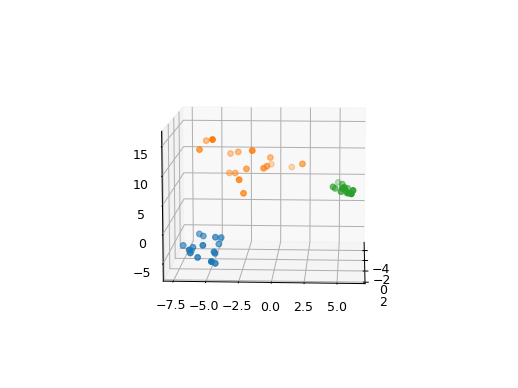

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(df_blobs.query('y==0')['X1'],df_blobs.query('y==0')['X2'],df_blobs.query('y==0')['X3'])
ax.scatter(df_blobs.query('y==1')['X1'],df_blobs.query('y==1')['X2'],df_blobs.query('y==1')['X3'])
ax.scatter(df_blobs.query('y==2')['X1'],df_blobs.query('y==2')['X2'],df_blobs.query('y==2')['X3'])

In [5]:
import Matrix
data_index,cut_matrix,point_cut_distance = Matrix.cut_ensemble(X)

In [6]:
data_index.head()

,0,1,2,index
0,-5.134935,-0.736594,7.176710,0
1,0.578117,-5.933500,-5.425098,1
2,0.717602,-6.559353,-3.993709,2
3,-2.569917,-4.654979,-4.846405,3
4,0.647538,-5.505340,-3.212045,4


In [7]:
print('number of hyperplanes: ',len(cut_matrix))
cut_matrix.head()

number of hyperplanes:  1225


,index1,index2,cut_index,magnitude_norm_vect,norm_vect_0,norm_vect_1,norm_vect_2
0,1,0,0,-0.454764,0.386536,-0.351614,-0.852618
1,2,0,1,-0.681259,0.421346,-0.419202,-0.804200
2,2,1,2,-1.747770,0.088932,-0.399027,0.912616
3,3,0,3,-1.032871,0.198792,-0.303679,-0.931805
4,3,1,4,-1.916538,-0.913352,0.370943,0.167899


In [8]:
print('number of rows = number of samples = ',len(point_cut_distance))
print('number of columns = number of hyperplanes + 1 = ',len(point_cut_distance.columns))
point_cut_distance.head()

number of rows = number of samples =  50
number of columns = number of hyperplanes + 1 =  1226


,cut_index_0,cut_index_1,cut_index_2,cut_index_3,cut_index_4,cut_index_5,cut_index_6,cut_index_7,cut_index_8,cut_index_9,...,cut_index_1216,cut_index_1217,cut_index_1218,cut_index_1219,cut_index_1220,cut_index_1221,cut_index_1222,cut_index_1223,cut_index_1224,point_index
0,-7.390067,-6.945052,8.134613,-6.451519,7.538265,3.396009,-6.405158,12.049748,10.969819,0.321529,...,3.649870,3.015502,-0.828030,5.630561,3.999785,2.721401,6.041122,2.114350,2.952003,0
1,7.390067,7.775045,-0.784223,8.004811,-1.723341,-1.209570,8.327923,-1.127580,-0.999060,0.916210,...,6.238631,-4.324494,-9.630482,-8.130441,-10.194145,-3.835141,-8.292151,2.900051,-4.143576,1
2,6.443614,6.945052,0.784223,6.888823,-1.842567,-1.946889,7.463053,0.162554,-0.657048,1.811776,...,4.843924,-2.795924,-9.628958,-7.213132,-9.289421,-2.325432,-7.246417,1.819260,-2.660952,2
3,5.230289,5.447291,-1.046224,6.451519,1.723341,1.946889,5.961685,-0.413860,0.538488,-1.853797,...,7.902499,-4.560422,-8.682679,-6.843219,-8.624665,-4.203497,-6.804668,3.368081,-4.159583,3
4,5.379465,5.845072,1.070771,5.826454,-1.256355,-1.543412,6.405158,1.127580,0.657048,1.853797,...,5.056827,-2.765927,-8.376006,-6.006453,-8.090622,-2.373706,-6.120681,2.484964,-2.709132,4


## MONDRIAN CLUSTERING FOREST

In [9]:
# parameter setting
t0 = 0
lifetime = 5
exp = 5
metric = 'min_corr'  # 'variance','centroid_diff','centroid_ratio','min'

In [10]:
# the forest consists of 5 trees
number_of_iterations = 3
list_part,list_m,list_p_tot,list_m_leaf_tot,ami_mean,ami_std,ami_tot = Mondrian.mondrian_forest(X,t0,lifetime,exp,metric,number_of_iterations)

Tree number 1
PARTITIONING:
total number of splits: 29
MERGING:
range of possible number of clusters: 1-20
Tree number 2
PARTITIONING:
total number of splits: 30
MERGING:
range of possible number of clusters: 1-19
Tree number 3
PARTITIONING:
total number of splits: 27
MERGING:
range of possible number of clusters: 1-22


The objects given as output of each tree are stored as elements of *list_part*, *list_m*, *list_p_tot*, *list_m_leaf_tot* (each index refers to a tree). *ami_tot* is a list of lists storing the adjusted mutual information computed for each pair of tree outcome and for each possible division into clusters (each element of the list corresponds to a specific pair of trees). *ami_mean* and *ami_std* are lists storing the ami averaged values and standard deviations (one value for each possible division).

### DETERMINATION OF THE NUMBER OF CLUSTERS

Plot of the averaged AMI coefficient vs the number of clusters.

<IPython.core.display.Javascript object>


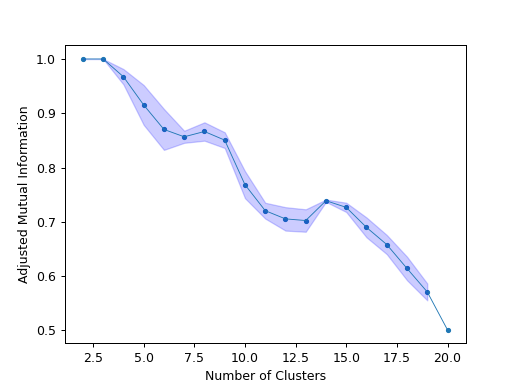

In [19]:
Plot.plot_AMI(ami_mean,ami_std)

### PLOT OF SINGLE TREE RESULTS

#### DATA CLASSIFICATION PLOT

<IPython.core.display.Javascript object>


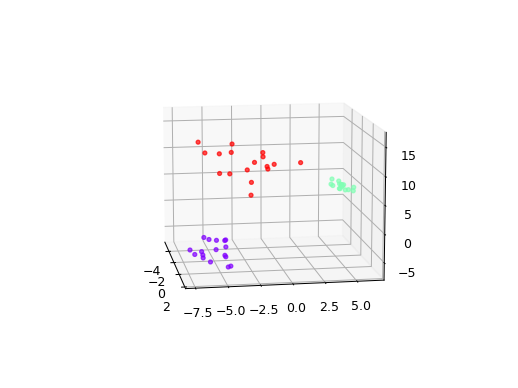

<IPython.core.display.Javascript object>


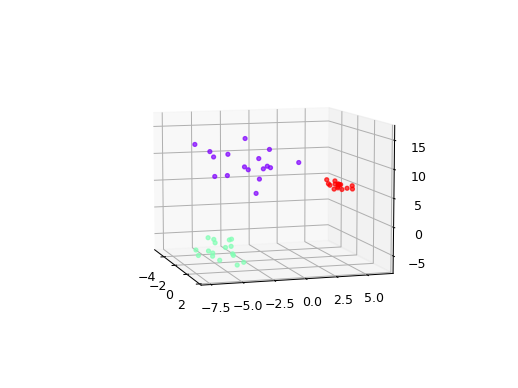

<IPython.core.display.Javascript object>


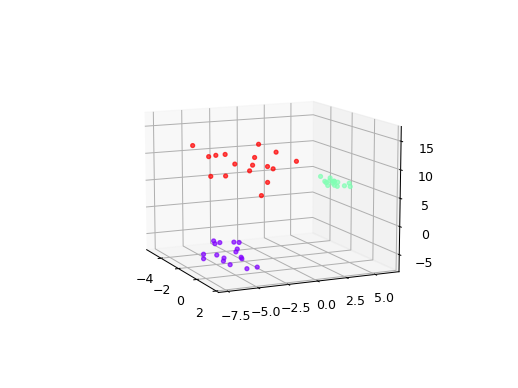

In [21]:
number_of_clusters = 3
for k in range(number_of_iterations):
    part = list_part[k]
    list_p = list_p_tot[k]
    list_m_leaf = list_m_leaf_tot[k]
    Plot.plot3D(part,list_p,list_m_leaf,number_of_clusters,True,False)

#### SPACE CLASSIFICATION PLOT

In [22]:
# select a specific tree output 
k = 0
part = list_part[k]
m = list_m[k]
list_p = list_p_tot[k]
list_m_leaf = list_m_leaf_tot[k]

<IPython.core.display.Javascript object>


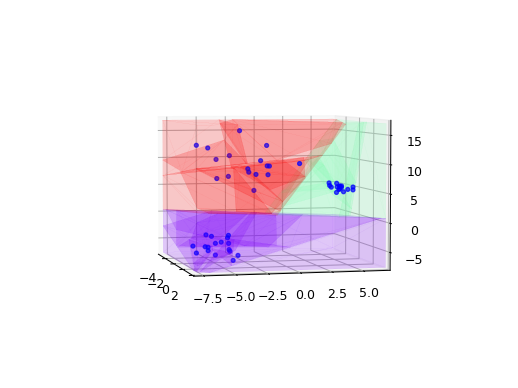

<IPython.core.display.Javascript object>


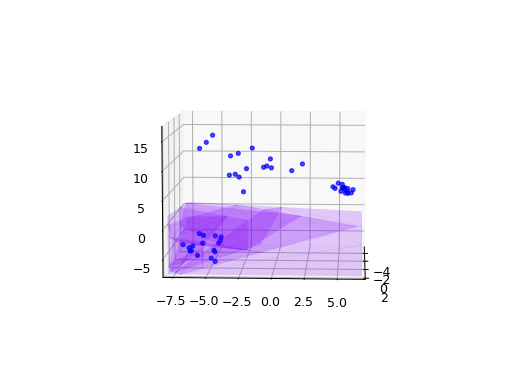

<IPython.core.display.Javascript object>


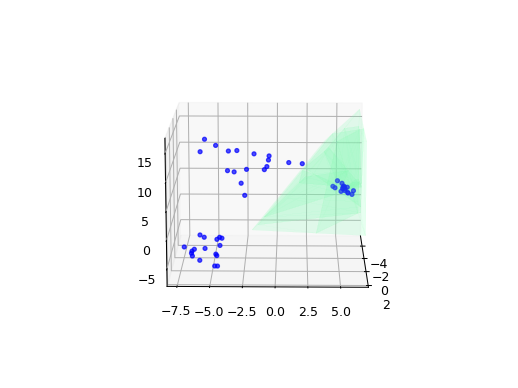

<IPython.core.display.Javascript object>


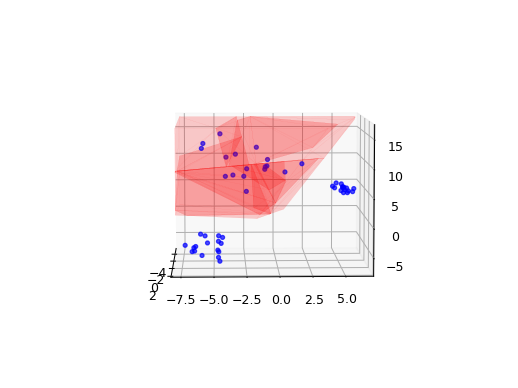

In [23]:
number_of_clusters = 3
Plot.plot3D(part,list_p,list_m_leaf,number_of_clusters,False,True)